In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import sys
import numpy as np

In [2]:
train_ori = pd.read_csv('train.csv')
train =  train_ori.copy()

In [3]:
test_ori = pd.read_csv('test.csv')
test = test_ori.copy()

In [4]:
import re

for id in train['PassengerId']:
    train.loc[train['PassengerId'] == id , 'Name_type'] = re.split('[,.]',train[train['PassengerId'] == id]['Name'].iloc[0].strip())[1]

In [5]:
for id in test['PassengerId']:
    test.loc[test['PassengerId'] == id , 'Name_type'] = re.split('[,.]',test[test['PassengerId'] == id]['Name'].iloc[0].strip())[1]

In [6]:
train.loc[train['Name_type']==' Mr','Name_type_num'] = 0
train.loc[train['Name_type']==' Ms','Name_type_num'] = 1
train.loc[train['Name_type']==' Mrs','Name_type_num'] = 2
train.loc[train['Name_type']==' Miss','Name_type_num'] = 3
train.loc[train['Name_type']==' Master','Name_type_num'] = 4
train.loc[train['Name_type']==' Don','Name_type_num'] = 5
train.loc[train['Name_type']==' Dona','Name_type_num'] = 6
train.loc[train['Name_type']==' Rev','Name_type_num'] = 7
train.loc[train['Name_type']==' Dr','Name_type_num'] = 8
train.loc[train['Name_type']==' Mme','Name_type_num'] = 9
train.loc[train['Name_type']==' Major','Name_type_num'] = 10
train.loc[train['Name_type']==' Lady','Name_type_num'] = 11
train.loc[train['Name_type']==' Sir','Name_type_num'] = 12
train.loc[train['Name_type']==' Mlle','Name_type_num'] = 13
train.loc[train['Name_type']==' Col','Name_type_num'] = 14
train.loc[train['Name_type']==' Capt','Name_type_num'] = 15
train.loc[train['Name_type']==' the Countess','Name_type_num'] = 16
train.loc[train['Name_type']==' Jonkheer','Name_type_num'] = 17

In [7]:
test.loc[test['Name_type']==' Mr','Name_type_num'] = 0
test.loc[test['Name_type']==' Ms','Name_type_num'] = 1
test.loc[test['Name_type']==' Mrs','Name_type_num'] = 2
test.loc[test['Name_type']==' Miss','Name_type_num'] = 3
test.loc[test['Name_type']==' Master','Name_type_num'] = 4
test.loc[test['Name_type']==' Don','Name_type_num'] = 5
test.loc[test['Name_type']==' Dona','Name_type_num'] = 6
test.loc[test['Name_type']==' Rev','Name_type_num'] = 7
test.loc[test['Name_type']==' Dr','Name_type_num'] = 8
test.loc[test['Name_type']==' Mme','Name_type_num'] = 9
test.loc[test['Name_type']==' Major','Name_type_num'] = 10
test.loc[test['Name_type']==' Lady','Name_type_num'] = 11
test.loc[test['Name_type']==' Sir','Name_type_num'] = 12
test.loc[test['Name_type']==' Mlle','Name_type_num'] = 13
test.loc[test['Name_type']==' Col','Name_type_num'] = 14
test.loc[test['Name_type']==' Capt','Name_type_num'] = 15
test.loc[test['Name_type']==' the Countess','Name_type_num'] = 16
test.loc[test['Name_type']==' Jonkheer','Name_type_num'] = 17

In [8]:
for i in test.index:
    if str(str.isdigit(test[test.index == i]['Ticket'].iloc[0])) == 'True':
        test.loc[test.index == i, 'employee_frag'] = 0
    else :
        test.loc[test.index == i, 'employee_frag'] = 1
test['employee_frag'] = test['employee_frag'].astype(int)

In [9]:
for i in train.index:
    if str(str.isdigit(train[train.index == i]['Ticket'].iloc[0])) == 'True':
        train.loc[train.index == i, 'employee_frag'] = 0
    else :
        train.loc[train.index == i, 'employee_frag'] = 1
train['employee_frag'] = train['employee_frag'].astype(int)

In [10]:
test['Name_type'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Ms', ' Col', ' Rev', ' Dr',
       ' Dona'], dtype=object)

In [11]:
test.loc[(test['Sex'] == 'female'), 'sex'] = 0
test.loc[(test['Sex'] == 'male'), 'sex'] = 1

In [12]:
train.loc[(train['Sex'] == 'female'), 'sex'] = 0
train.loc[(train['Sex'] == 'male'), 'sex'] = 1

C:\Users\ryota_hara\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Text(0,0.5,'num')

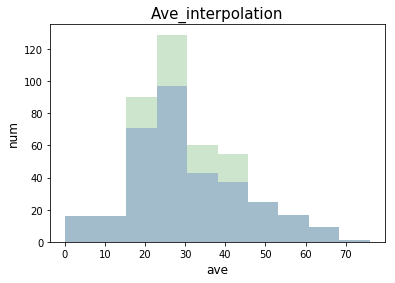

In [19]:
#平均・標準偏差・null数を取得する
Age_average = test["Age"].mean() #平均値
Age_std = test["Age"].std()  #標準偏差
Age_nullcount = test["Age"].isnull().sum() #null値の数＝補完する数

# 正規分布に従うとし、標準偏差の範囲内でランダムに数字を作る
rand = np.random.randint(Age_average - Age_std, Age_average + Age_std , size = Age_nullcount)

#Ageの欠損値
test["Age"][np.isnan(test["Age"])] = rand

#グラフ描画
plt.hist(test_ori["Age"].dropna(), alpha=0.2,color="b")
plt.hist(test["Age"],alpha=0.2,color="g")

plt.title('Ave_interpolation',size=15)
plt.xlabel('ave',size=12)
plt.ylabel('num',size=12)

C:\Users\ryota_hara\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


(array([ 54.,  58., 235., 218., 160.,  86.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

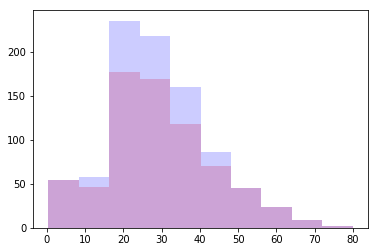

In [48]:
#平均・標準偏差・null数を取得する
Age_average = train["Age"].mean() #平均値
Age_std = train["Age"].std()  #標準偏差
Age_nullcount = train["Age"].isnull().sum() #null値の数＝補完する数

# 正規分布に従うとし、標準偏差の範囲内でランダムに数字を作る
rand = np.random.randint(Age_average - Age_std, Age_average + Age_std , size = Age_nullcount)

#Ageの欠損値
train["Age"][np.isnan(train["Age"])] = rand

#グラフ描画
plt.hist(train_ori["Age"].dropna(), alpha=0.2,color="r")
plt.hist(train["Age"],alpha=0.2,color="b")

C:\Users\ryota_hara\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


(array([339.,  48.,  11.,   2.,  10.,   7.,   0.,   0.,   0.,   1.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

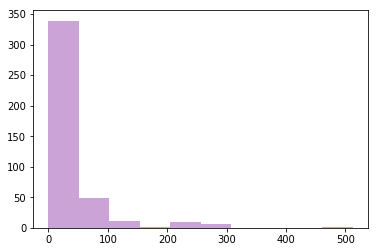

In [49]:
#平均・標準偏差・null数を取得する
Age_average = test["Fare"].mean() #平均値
Age_std = test["Fare"].std()  #標準偏差
Age_nullcount = test["Fare"].isnull().sum() #null値の数＝補完する数

# 正規分布に従うとし、標準偏差の範囲内でランダムに数字を作る
rand = np.random.randint(Age_average - Age_std, Age_average + Age_std , size = Age_nullcount)

#Ageの欠損値
test["Fare"][np.isnan(test["Fare"])] = rand

#グラフ描画
plt.hist(test_ori["Fare"].dropna(), alpha=0.2,color="r")
plt.hist(test["Fare"],alpha=0.2,color="b")

In [50]:
test.loc[(test['Age'] <= 5), 'age_type'] = 1
test.loc[(test['Age'] >= 6) & (test['Age'] <= 17), 'age_type'] = 2
test.loc[(test['Age'] >= 18) & (test['Age'] <= 29), 'age_type'] = 3
test.loc[(test['Age'] >= 30) & (test['Age'] <= 49), 'age_type'] = 4
test.loc[(test['Age'] >= 50) & (test['Age'] <= 64), 'age_type'] = 5
test.loc[(test['Age'] >= 65), 'age_type'] = 6
test.loc[(test['Age'].isnull()), 'age_type'] = 0

In [51]:
train.loc[(train['Age'] <= 5), 'age_type'] = 1
train.loc[(train['Age'] >= 6) & (train['Age'] <= 17), 'age_type'] = 2
train.loc[(train['Age'] >= 18) & (train['Age'] <= 29), 'age_type'] = 3
train.loc[(train['Age'] >= 30) & (train['Age'] <= 49), 'age_type'] = 4
train.loc[(train['Age'] >= 50) & (train['Age'] <= 64), 'age_type'] = 5
train.loc[(train['Age'] >= 65), 'age_type'] = 6
train.loc[(train['Age'].isnull()), 'age_type'] = 0

## ランダムフォレスト

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # 訓練データと検証データに分ける関数
from sklearn.metrics import confusion_matrix, accuracy_score # 混同行列, 予測正解率を求める関数
import seaborn as sns

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
# 特徴量と目的変数に分ける
X_train = train.drop(labels = ["Name_type","Age","Sex","Embarked","Ticket","Name","Cabin","Survived"], axis = 1)
y_train = train["Survived"]

X_test = test.drop(labels = ["Age","Sex","Embarked","Ticket","Name","Cabin"], axis = 1)

# 特徴量名を取り出しておく
feature_x_train = X_train.columns
feature_y_train = y_train.name

# 学習データと評価データに分ける
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0) 
print("shape of X and y for training: ", X_train_train.shape, y_train_train.shape)
print("shape of X and y for testing: ", X_train_test.shape, y_train_test.shape)

reg_rf_train = RandomForestRegressor(random_state=0, n_estimators=1000)
reg_rf_train.fit(X=X_train_train, y=y_train_train)

# 変数重要度
pd.Series(data = reg_rf_train.feature_importances_, 
          index = feature_x_train).sort_values(ascending = False)

shape of X and y for training:  (712, 11) (712,)
shape of X and y for testing:  (179, 11) (179,)


Name_type_num    0.290539
PassengerId      0.226983
Fare             0.185016
Pclass           0.066777
family_full      0.056745
sex              0.055830
age_type         0.050631
Embarked_n       0.022231
SibSp            0.019364
employee_frag    0.015773
Parch            0.010110
dtype: float64

In [41]:
X_test.isnull().sum()

PassengerId      0
Pclass           0
SibSp            0
Parch            0
Fare             0
employee_frag    0
sex              0
age_type         0
dtype: int64

In [90]:
# 予測
y_rf_train_pred = reg_rf_train.predict(X_test)

In [91]:
pd.DataFrame(y_rf_train_pred)

,0
0,0.104
1,0.546
2,0.067
3,0.106
4,0.400
5,0.089
6,0.439
7,0.257
8,0.719
9,0.095


In [93]:
output = pd.concat([test['PassengerId'],pd.DataFrame(y_rf_train_pred)],axis=1)

In [98]:
output = output.rename(columns={0:'Survived_tmep'})

# 予測結果をsubmissionの形に直す

In [103]:
output.loc[output['Survived_tmep'] >= 0.5, 'Survived'] = 1
output.loc[output['Survived_tmep'] < 0.5, 'Survived'] = 0

In [109]:
output = output[['PassengerId','Survived']].astype(int)

In [111]:
output.to_csv('gender_submission_r1.csv')

# 勾配ブースティング

In [64]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV
from sklearn.gaussian_process import GaussianProcessRegressor

## 特徴量推定

### RFEでの特徴量推定
-そんなに特徴量もないから必要…かな？

In [12]:
xgb.__version__

'0.72'

In [65]:
X='X_train_train'
y='y_train_train'

### GridSearchCVでのパラメーター推定

In [66]:
df_except_y = train.drop(["Name_type","PassengerId","Age","Sex","Embarked","Ticket","Name","Cabin","Survived"], axis=1)
X = df_except_y.as_matrix()

# 目的変数に "y " を利用
y = train['Survived'].as_matrix()

params = {"learning_rate":[0.1,0.3,0.5],
        "max_depth": [2,3,5,10],
         "subsample":[0.5,0.8,0.9,1],
         "colsample_bytree": [0.5,1.0],
         }

# ハイパーパラメータ探索
mod = xgb.XGBRegressor()
cv = GridSearchCV(mod, params, cv = 10, scoring= 'roc_auc', n_jobs =-1)

#　trainデータとtestデータに分割
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0) 
print("shape of X and y for training: ", X_train_train.shape, y_train_train.shape)
print("shape of X and y for testing: ", X_train_test.shape, y_train_test.shape)

# 予測モデルを作成
cv.fit(X=X_train_train, y=y_train_train)

# 変数重要度
pd.Series(data = reg_rf_train.feature_importances_, 
          index = feature_x_train).sort_values(ascending = False)

C:\Users\ryota_hara\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\ryota_hara\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


shape of X and y for training:  (712, 11) (712,)
shape of X and y for testing:  (179, 11) (179,)


Name_type_num    0.290539
PassengerId      0.226983
Fare             0.185016
Pclass           0.066777
family_full      0.056745
sex              0.055830
age_type         0.050631
Embarked_n       0.022231
SibSp            0.019364
employee_frag    0.015773
Parch            0.010110
dtype: float64

In [43]:
#予測    
y_train_pred = cv.predict(X_train)
y_test_pred = cv.predict(X_test)

In [45]:
y_test_pred

array([0.24916297, 0.74552613, 0.31168646, 0.26871604, 0.67430186,
       0.44472557, 0.7416446 , 0.35251558, 0.752619  , 0.1727305 ,
       0.24916297, 0.42651552, 1.1198907 , 0.34875607, 1.0764167 ,
       0.97027886, 0.2812817 , 0.23661932, 0.65914047, 0.7416446 ,
       0.521379  , 0.38932523, 1.0549687 , 0.5177478 , 1.0760174 ,
       0.29063588, 1.12193   , 0.23661932, 0.48161328, 0.23843312,
       0.33334273, 0.27420354, 0.6374069 , 0.598219  , 0.5321545 ,
       0.23661932, 0.6694288 , 0.65976983, 0.26871604, 0.39899534,
       0.29026824, 0.58293796, 0.23374963, 0.9827669 , 1.2119488 ,
       0.2629617 , 0.46619996, 0.26013738, 1.1255611 , 0.64799803,
       0.5200254 , 0.30196285, 0.9599606 , 1.0465473 , 0.29098845,
       0.179907  , 0.24916297, 0.26013738, 0.28806898, 1.1286901 ,
       0.43614697, 0.30640176, 0.26013738, 0.7761371 , 0.6775476 ,
       0.9740534 , 0.73304856, 0.43571463, 0.48161328, 0.9515619 ,
       0.7761371 , 0.26013738, 0.685145  , 0.47257283, 1.09805

In [46]:
pd.DataFrame(y_test_pred)

,0
0,0.249163
1,0.745526
2,0.311686
3,0.268716
4,0.674302
5,0.444726
6,0.741645
7,0.352516
8,0.752619
9,0.172731


In [48]:
output = pd.concat([test['PassengerId'],pd.DataFrame(y_test_pred)],axis=1)

In [49]:
output = output.rename(columns={0:'Survived_tmep'})

In [50]:
output.loc[output['Survived_tmep'] >= 0.5, 'Survived'] = 1
output.loc[output['Survived_tmep'] < 0.5, 'Survived'] = 0

In [51]:
output = output[['PassengerId','Survived']].astype(int)

In [53]:
output.to_csv('gender_submission_r2.csv',index=False)

# 分析2

特徴量を増やすためEmbarkedを数値化
Embarked = S:1,Q:2,C:3

nullは最頻値で穴埋め

In [55]:
import statistics
import math

In [56]:
train['Embarked'] = train['Embarked'].fillna(statistics.mode(train['Embarked']))
test['Embarked'] = test['Embarked'].fillna(statistics.mode(test['Embarked']))

In [57]:
train.loc[train['Embarked']=='S','Embarked_n'] = 0
train.loc[train['Embarked']=='Q','Embarked_n'] = 1
train.loc[train['Embarked']=='C','Embarked_n'] = 2

In [58]:
test.loc[test['Embarked']=='S','Embarked_n'] = 0
test.loc[test['Embarked']=='Q','Embarked_n'] = 1
test.loc[test['Embarked']=='C','Embarked_n'] = 2

In [59]:
train.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           0
Name_type          0
Name_type_num      0
employee_frag      0
sex                0
age_type           0
Embarked_n         0
dtype: int64

家族の総人数も作成

In [60]:
train['family_full'] = train['SibSp'] + train['Parch']
test['family_full'] = test['SibSp'] + test['Parch']

In [79]:
train_except_y = train.drop(["Name_type","PassengerId","Sex","Embarked","Ticket","Name","Cabin","Survived"], axis=1)
test_except_y = test.drop(["Name_type","PassengerId","Sex","Embarked","Ticket","Name","Cabin"], axis=1)
X = df_except_y.as_matrix()

# 目的変数に "y " を利用
y = train['Survived'].as_matrix()

params = {"learning_rate":[0.1,0.3,0.5],
        "max_depth": [2,3,5,10],
         "subsample":[0.5,0.8,0.9,1],
         "colsample_bytree": [0.5,1.0],
         }

# モデルにインスタンス生成
mod = xgb.XGBRegressor()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 10, scoring= 'roc_auc', n_jobs =-1)

C:\Users\ryota_hara\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ryota_hara\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [141]:
cv

GridSearchCV(cv=10, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.3, 0.5], 'max_depth': [2, 3, 5, 10], 'subsample': [0.5, 0.8, 0.9, 1], 'colsample_bytree': [0.5, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
features  = train.drop(["Name_type","PassengerId","Sex","Embarked","Ticket","Name","Cabin","Survived"], axis=1)
target = train["Survived"].values
forest = GradientBoostingClassifier(n_estimators=100, random_state=0)
forest = forest.fit(features, target)

In [74]:
forest

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [130]:
y_test_pred = forest.predict(test_except_y)

In [131]:
test.count()

PassengerId      418
Pclass           418
Name             418
Sex              418
Age              418
SibSp            418
Parch            418
Ticket           418
Fare             418
Cabin             91
Embarked         418
employee_frag    418
sex              418
age_type         418
Embarked_n       418
family_full      418
dtype: int64

In [132]:
len(y_test_pred)

418

In [133]:
pd.DataFrame(y_test_pred)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,1
9,0


In [134]:
output = pd.concat([test['PassengerId'],pd.DataFrame(y_test_pred)],axis=1)

In [135]:
output = output.rename(columns={0:'Survived_tmep'})

In [136]:
output.loc[output['Survived_tmep'] >= 0.5, 'Survived'] = 1
output.loc[output['Survived_tmep'] < 0.5, 'Survived'] = 0

In [137]:
output.isnull().sum()

PassengerId      0
Survived_tmep    0
Survived         0
dtype: int64

In [138]:
output = output[['PassengerId','Survived']].astype(int)

In [139]:
output.to_csv('gender_submission_r3.csv',index=False)

# グリッドサーチ

In [76]:
from sklearn import ensemble
from sklearn import grid_search

In [87]:
parameters = {
    'n_estimators' : [5000],
    'random_state' : [0],
    'n_jobs'       : [4],
    'min_samples_split':[10,11,12,13,14,15],
    'max_depth'   : [5]
    
}

ranfore_clf_grid = grid_search.GridSearchCV(ensemble.RandomForestClassifier() ,parameters, cv=5)
ranfore_clf_grid.fit(features, target)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5000], 'random_state': [0], 'n_jobs': [4], 'min_samples_split': [10, 11, 12, 13, 14, 15], 'max_depth': [5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [80]:
y_test_pred = ranfore_clf_grid.predict(test_except_y)

In [81]:
output = pd.concat([test['PassengerId'],pd.DataFrame(y_test_pred)],axis=1)

In [82]:
output = output.rename(columns={0:'Survived_tmep'})

In [84]:
output.isnull().sum()

PassengerId      0
Survived_tmep    0
Survived         0
dtype: int64

In [85]:
output = output[['PassengerId','Survived']].astype(int)

In [86]:
output.to_csv('gender_submission_r6.csv',index=False)

In [ ]:
output_1 = output.copy()